In [ ]:
import os
import math
import imblearn
import logging
import warnings
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score , accuracy_score , precision_score, recall_score ,confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D
from imblearn.combine import SMOTEENN
%matplotlib inline




from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Epileptic_Seizure_Recognition[1].csv')

In [ ]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
data.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [ ]:
data.shape

(11500, 180)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [ ]:
data.describe(include=object)

,Unnamed
count,11500
unique,11500
top,X21.V1.791
freq,1


In [ ]:
null_values = data.isnull().sum()
null_values.to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
data_1 = data.copy()

In [ ]:
data_1.drop(['Unnamed','y'],axis=1,inplace=True)

In [ ]:
data_1

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [ ]:
data['y'].value_counts()


,count
y,
4,2300
1,2300
5,2300
2,2300
3,2300


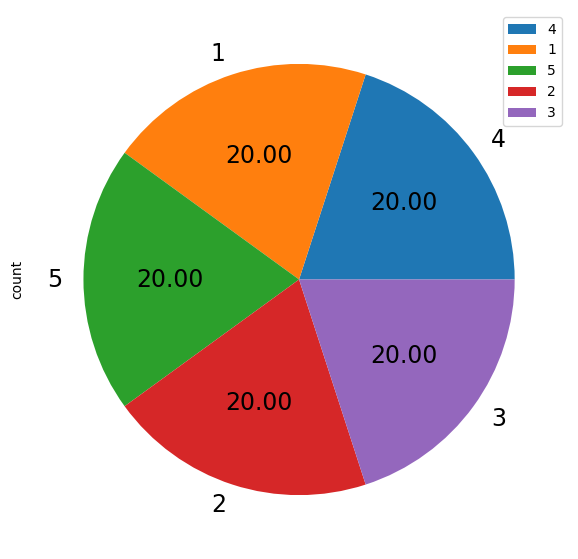

In [ ]:

values = data['y'].value_counts()
plt.figure(figsize=(7,7))
values.plot(kind='pie',fontsize=17, autopct='%.2f')
plt.legend(loc="best")
plt.show()


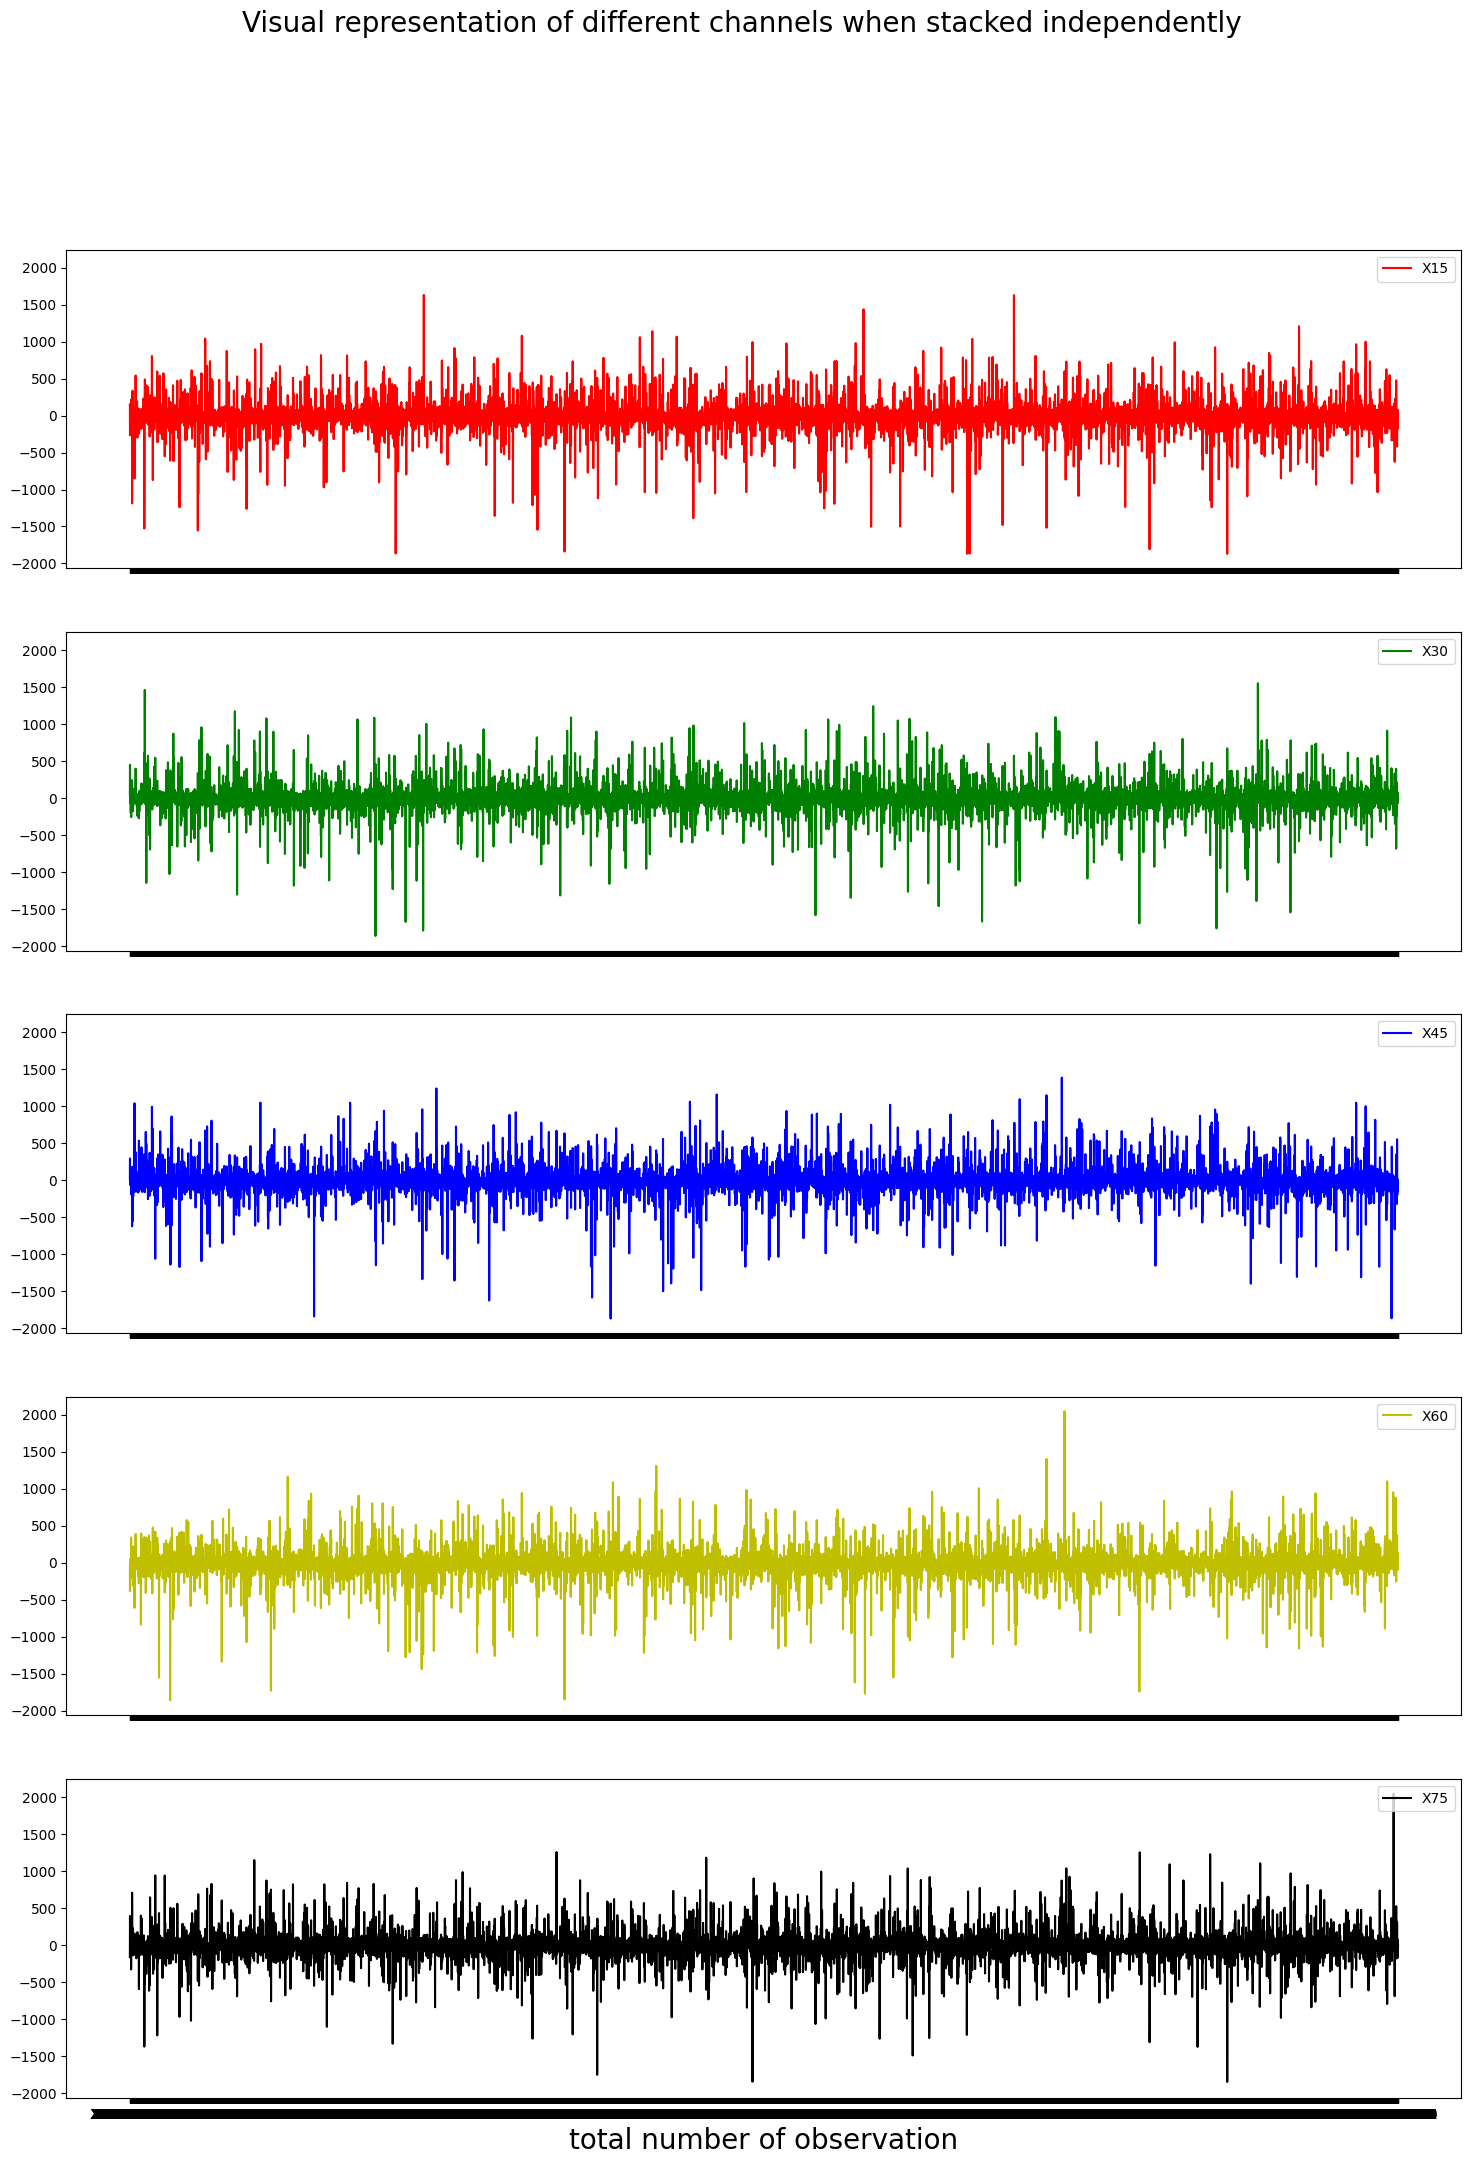

In [ ]:

fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.set_size_inches(18, 24)
labels = ["X15","X30","X45","X60","X75"]
colors = ["r","g","b",'y',"k"]
fig.suptitle('Visual representation of different channels when stacked independently', fontsize = 20)
for i,ax in enumerate(axs):
  axs[i].plot(data.iloc[:,0],data[labels[i]],color=colors[i],label=labels[i])
  axs[i].legend(loc="upper right")

plt.xlabel('total number of observation', fontsize = 20)
plt.show()

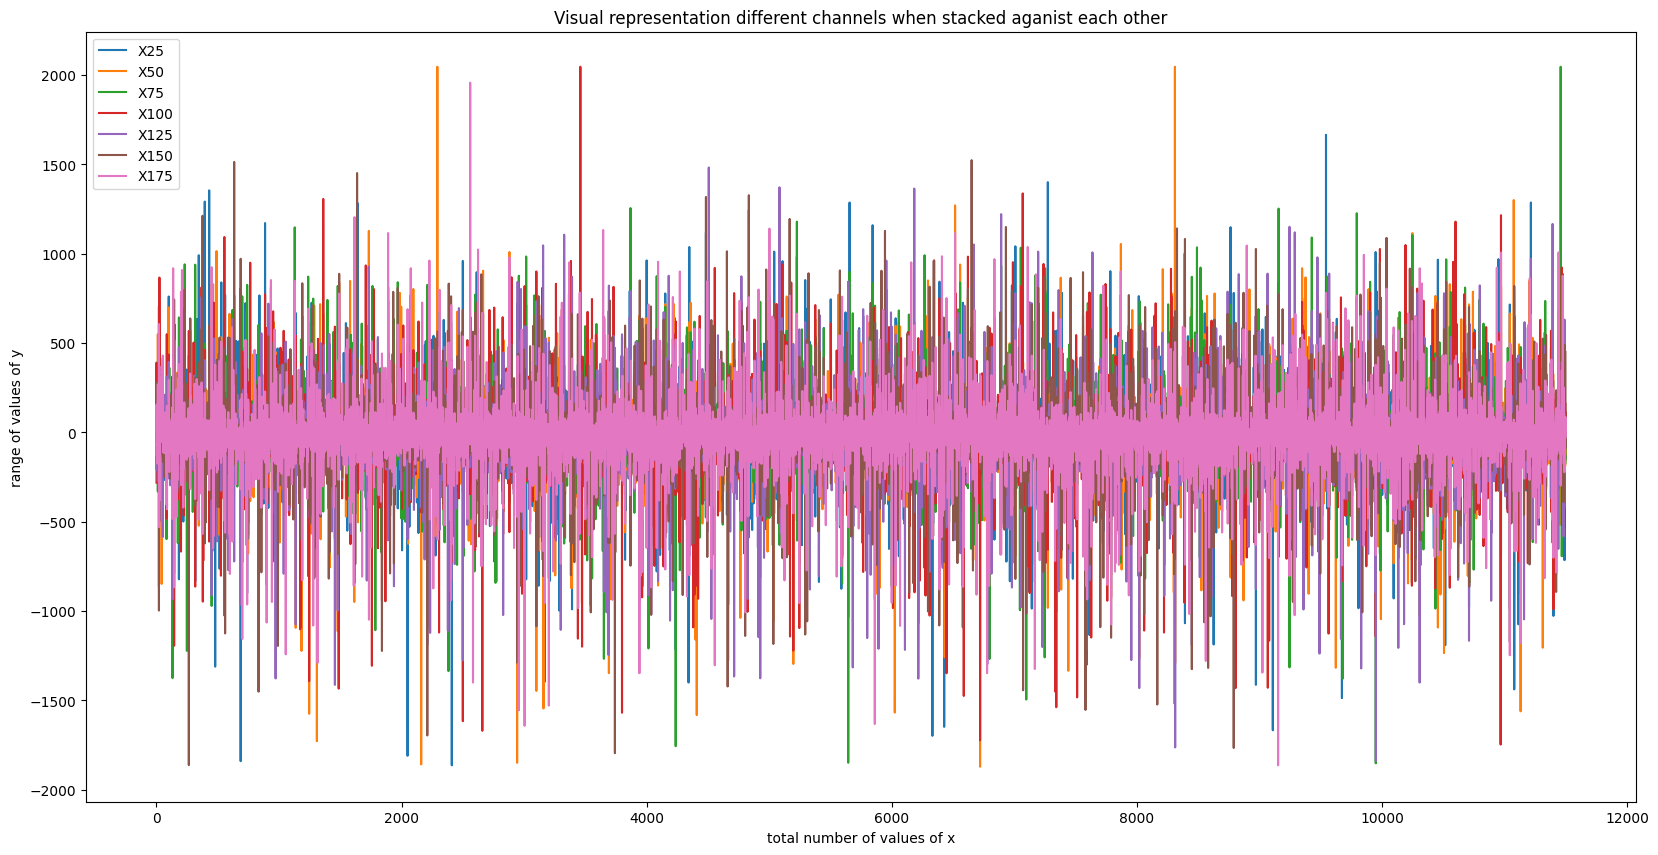

In [ ]:

plt.rcParams["figure.figsize"] = (20, 10)
data.loc[:,::25].plot()
plt.title("Visual representation different channels when stacked aganist each other")
plt.xlabel("total number of values of x")
plt.ylabel("range of values of y")
plt.show()

Here we have plotted all the waves in the same chart just have an idea how they differ from each other by the value of frequency. Though we can find most of them overlap each other.

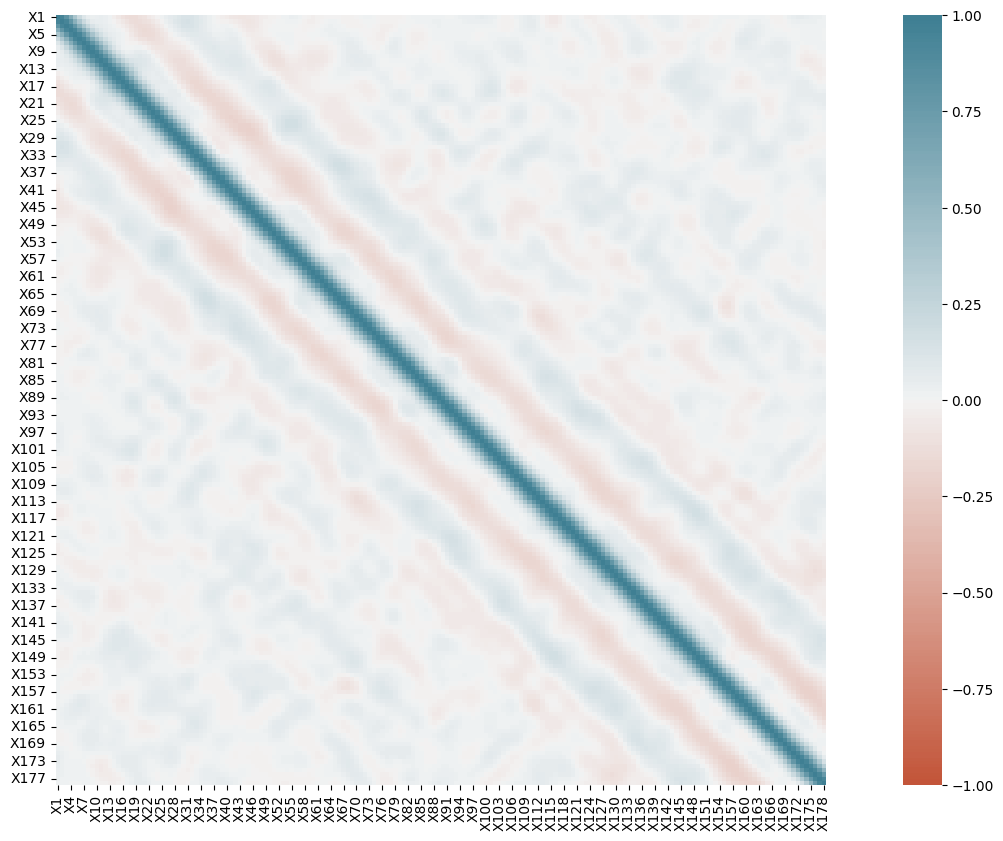

In [ ]:
# Correlation Matrix
corr = data_1.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [ ]:
data_2 = data.drop(["Unnamed"],axis=1).copy()

In [ ]:
data_2["Output"]= data_2.y == 0

In [ ]:
data_2["Output"] = data_2["Output"].astype(int)

In [ ]:
data_2.y.value_counts()

,count
y,
4,2300
1,2300
5,2300
2,2300
3,2300


In [ ]:
data_2['y'] = data_2['y'].replace([2,3,4,5],0)

In [ ]:
data_2.y.value_counts()

,count
y,
0,9200
1,2300


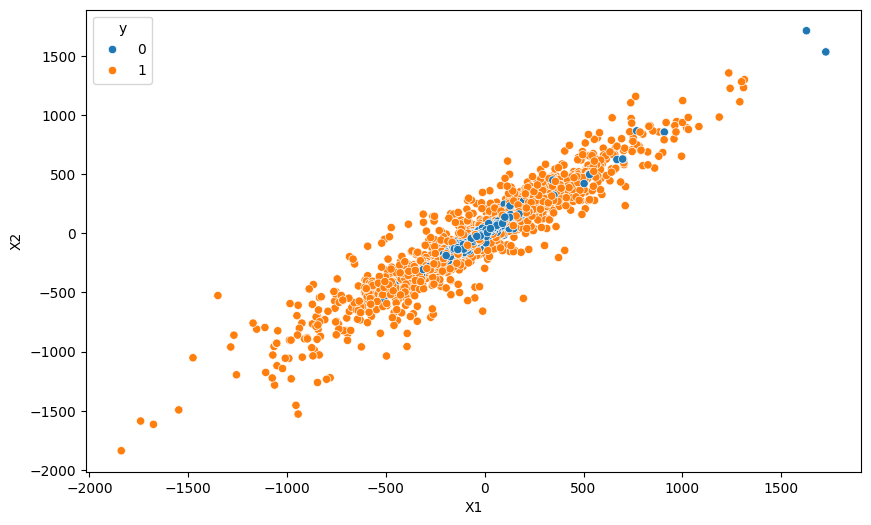

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
sns.despine(left=True)
sns.scatterplot(x='X1', y='X2', hue = 'y', data=data_2)
plt.show()


In [ ]:
data_2.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X171,X172,X173,X174,X175,X176,X177,X178,y,Output
0,135,190,229,223,192,125,55,-9,-33,-38,...,-15,-31,-77,-103,-127,-116,-83,-51,0,0
1,386,382,356,331,320,315,307,272,244,232,...,150,146,152,157,156,154,143,129,1,0
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,64,48,19,-12,-30,-35,-35,-36,0,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-81,-80,-77,-85,-77,-72,-69,-65,0,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,2,-12,-32,-41,-65,-83,-89,-73,0,0


In [ ]:
data_2.y.value_counts()

,count
y,
0,9200
1,2300


In [ ]:
X  = data_2.drop(['Output','y'], axis=1)
y = data_2['y']

In [ ]:
counter = Counter(y)

print('Before',counter)

smenn = SMOTEENN()
X_train1, y_train1 = smenn.fit_resample(X, y)

counter = Counter(y_train1)
print('After',counter)

Before Counter({0: 9200, 1: 2300})
After Counter({0: 9063, 1: 9058})


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_train1,y_train1,test_size=0.4,random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
print("The shape of the training set is :{}".format(X_train.shape))
print("The shape of the testing set is :{}".format(X_test.shape))
print("The shape of the validation set is :{}".format(X_val.shape))

The shape of the training set is :(10872, 178)
The shape of the testing set is :(3625, 178)
The shape of the validation set is :(3624, 178)


# Logistic Regression

In [ ]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn import metrics

y_pred = logreg.predict(X_val)

print(metrics.accuracy_score(y_val, y_pred))

0.6363134657836644


In [ ]:
y_train_re = y_train.values.reshape(-1,1)
y_val_re = y_val.values.reshape(-1,1)

In [ ]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train_re)
y_pred = logreg.predict(X_val)

print("The accuracy score of the model on the validation data is:{}.".format(metrics.accuracy_score(y_val_re, y_pred)*100))

Myconfusion = metrics.confusion_matrix(y_pred,y_val_re)
print("This is the required confusion matrix of the model:{}.".format(Myconfusion))

The accuracy score of the model on the validation data is:63.63134657836645.
This is the required confusion matrix of the model:[[1353  895]
 [ 423  953]].


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67      1776
           1       0.69      0.52      0.59      1848

    accuracy                           0.64      3624
   macro avg       0.65      0.64      0.63      3624
weighted avg       0.65      0.64      0.63      3624



In [ ]:

y_pred = logreg.predict(X_val)

logit_fpr, logit_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
logit_auc = metrics.roc_auc_score(y_val, y_pred)

# K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 100)
knn.fit(X_train,y_train)

y_valid_preds = knn.predict_proba(X_val)

precision = metrics.accuracy_score(y_pred, y_val) * 100
print("Accuracy with K-NN: {0:.2f}%".format(precision))
print(classification_report(y_val,y_pred))


Accuracy with K-NN: 63.63%
              precision    recall  f1-score   support

           0       0.60      0.76      0.67      1776
           1       0.69      0.52      0.59      1848

    accuracy                           0.64      3624
   macro avg       0.65      0.64      0.63      3624
weighted avg       0.65      0.64      0.63      3624



In [ ]:

y_pred = knn.predict(X_val)

knn_fpr, knn_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
knn_auc = metrics.roc_auc_score(y_val, y_pred)

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm = SVC(gamma='auto', kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_val)


precision = metrics.accuracy_score(y_pred, y_val) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))

probs = svm.predict_proba(X_val)
probs = probs[:, 1]
svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_val, probs)
svm_auc = metrics.roc_auc_score(y_val, probs)

Accuracy with SVM: 64.65%


In [ ]:

y_pred = svm.predict(X_val)

svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
svm_auc = metrics.roc_auc_score(y_val, y_pred)

# Decision Trees (DTs)

In [ ]:

from sklearn import tree
tree_eeg = tree.DecisionTreeClassifier()
tree = tree_eeg.fit(X_train,y_train)

y_pred = tree.predict(X_val)

precision = metrics.accuracy_score(y_pred,y_val)* 100

print("Accuracy of the model by using the decision tree algorithm : {0:.2f}%".format(precision))

Accuracy of the model by using the decision tree algorithm : 92.30%


In [ ]:

y_pred = tree.predict(X_val)
tree_fpr, tree_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
tree_auc = metrics.roc_auc_score(y_val, y_pred)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(max_depth=10,random_state=69)
random.fit(X_train,y_train)

y_pred = random.predict(X_val)

precision = metrics.accuracy_score(y_pred,y_val)* 100

print("Accuracy of the model by using the random algorithm : {0:.2f}%".format(precision))


Accuracy of the model by using the random algorithm : 96.61%


In [ ]:

y_pred = random.predict(X_val)
random_fpr, random_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
random_auc = metrics.roc_auc_score(y_val, y_pred)

# XGBoost

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier()

xgbc.fit(X_train,y_train)

print("XGBoost")

y_pred = xgbc.predict(X_val)

precision = metrics.accuracy_score(y_pred,y_val)* 100

print("Accuracy of the model by using the xgbc algorithm : {0:.2f}%".format(precision))

XGBoost
Accuracy of the model by using the xgbc algorithm : 98.12%


In [ ]:

y_pred = xgbc.predict(X_val)
xgbc_fpr, xgbc_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
xgbc_auc = metrics.roc_auc_score(y_val, y_pred)

# Plotting the ROC Curve

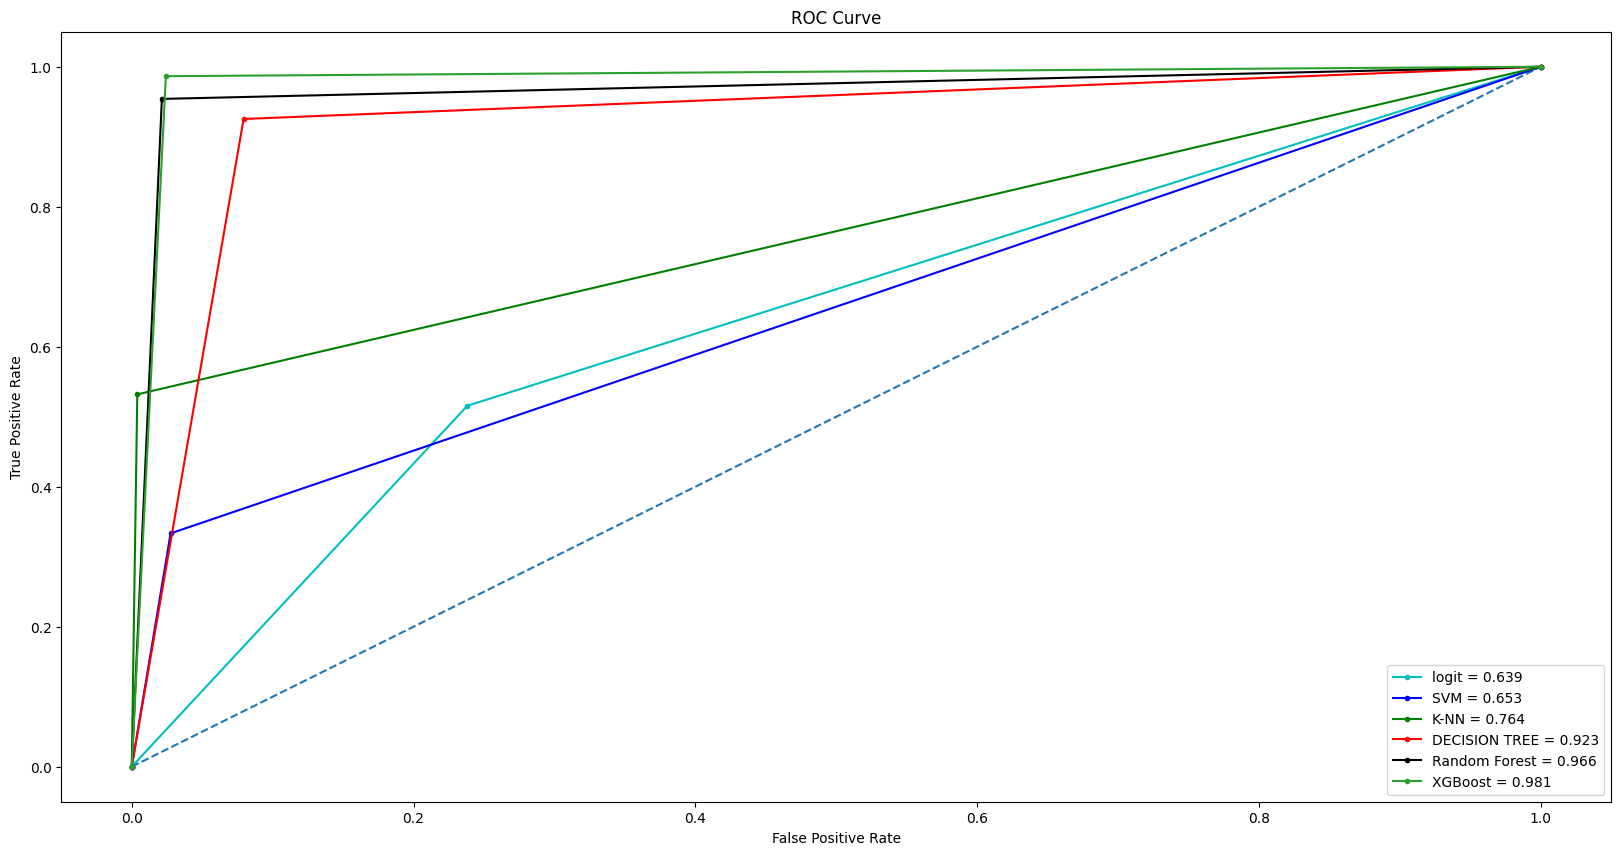

In [ ]:

plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_fpr, logit_tpr, 'c', marker='.', label = 'logit = %0.3f' % logit_auc )
plt.plot(svm_fpr, svm_tpr, 'b', marker='.', label = 'SVM = %0.3f' % svm_auc )
plt.plot(knn_fpr, knn_tpr, 'g', marker='.', label = 'K-NN = %0.3f' % knn_auc)
plt.plot(tree_fpr, tree_tpr, 'r', marker='.',label = 'DECISION TREE = %.3f' % tree_auc)
plt.plot(random_fpr, random_tpr, 'k', marker='.',label = 'Random Forest = %.3f' % random_auc)
plt.plot(xgbc_fpr, xgbc_tpr, 'C2', marker='.',label = 'XGBoost = %.3f' % xgbc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Deep Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

y_pred_prob = model.predict(X_val_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

NN_accuracy = accuracy_score(y_val, y_pred) * 100
print("NN Accuracy: {0:.2f}%".format(NN_accuracy))

fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
auc = roc_auc_score(y_val, y_pred_prob)
print(f"AUC: {auc:.2f}")


Epoch 1/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7691 - loss: 0.4472
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9715 - loss: 0.0952
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9772 - loss: 0.0680
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9810 - loss: 0.0527
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9872 - loss: 0.0372
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9894 - loss: 0.0353
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9919 - loss: 0.0275
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9939 - loss: 0.0218
Epoch 9/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9917 - loss: 0.0266
Epoch 10/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9957 - loss: 0.0155
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
NN Accuracy: 97.96%
AUC: 1.00


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_reshaped = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32)

y_pred_prob = model.predict(X_val_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int)

LSTM_accuracy = accuracy_score(y_val, y_pred) * 100
print("LSTM Accuracy: {0:.2f}%".format(LSTM_accuracy))

fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
auc = roc_auc_score(y_val, y_pred_prob)
print(f"AUC: {auc:.2f}")


Epoch 1/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7634 - loss: 0.4946
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9591 - loss: 0.1835
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9734 - loss: 0.0955
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9816 - loss: 0.0688
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9885 - loss: 0.0472
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9889 - loss: 0.0383
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9938 - loss: 0.0273
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9947 - loss: 0.0217
Epoch 9/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9961 - loss: 0.0186
Epoch 10/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9980 - loss: 0.0127
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
LSTM Accuracy: 98.18%
AUC: 1.00


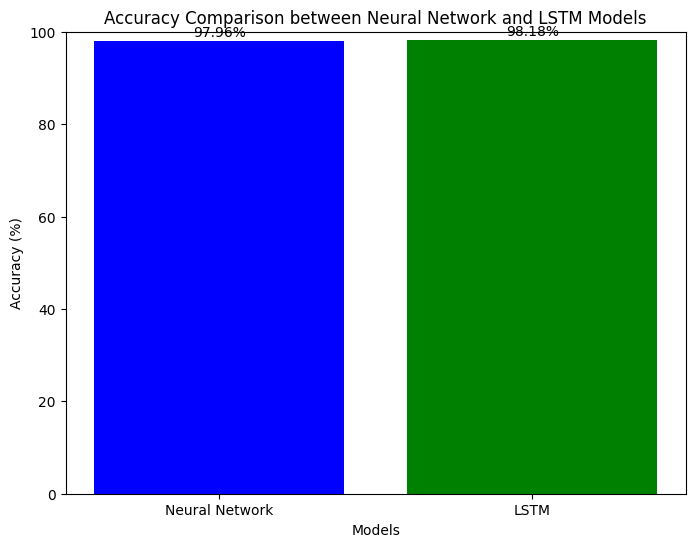

In [ ]:
import matplotlib.pyplot as plt

nn_accuracy = NN_accuracy
lstm_accuracy = LSTM_accuracy
models = ['Neural Network', 'LSTM']

accuracy_values = [nn_accuracy, lstm_accuracy]

plt.figure(figsize=(8,6))
plt.bar(models, accuracy_values, color=['blue', 'green'])

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison between Neural Network and LSTM Models')
plt.ylim([0, 100])
for i in range(len(accuracy_values)):
    plt.text(i, accuracy_values[i] + 1, f'{accuracy_values[i]:.2f}%', ha='center')


plt.show()
